In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier
from matplotlib.pyplot import figure

# Task 1
### Purpose
Describe (in a markdown cell) how a perceptron can be used to classify two objects given their circumference and weight. You may assume that these two features result in linear separability of the two classes in the given dataset. Use the following terms in your description:

- Input space
- Output space
- Unknown target function
- Data set
- Hypothesis set
- Final Hypothesis
- Error measure
- In-sample error
- Out-of-sample error

## Answer:

Perceptron is an ML algorithm to perform binary classification. We can think about the process as finding the best straight line that separates the groups of data.<br>
Once the "line of best separation" is generated, we can then feed in new data point for the algorithm to decide which group this data point belongs to.<br>

This line of best separation is a final hypothesis that approximates the real UNKNOWN target function. We will most likely never going to find the unknown target function and we have to make sure that our line of best separation is reasonably close to the unknown target function.<br>
We make sure our final hypothesis is close to the unknown target function by using a largest enough number of sample data set.<br>
And to decide which hypothesis to use, we need to evaluate if the error measure is acceptable. Acceptability can be determined by the client on the suitable tolerance.<br>
Note: Error Measure is a form of measure(MSE for regression, binary error for classification)

There are two types of error in VC analysis for binary classification:
- In-Sample Error: This is the sum of all point-wise binary errors from our sample dataset.
- Out-Of-Sample Error: This is the sum of all point-wise binary error data outside of the sample used for training.
In general, as our sample size increase, our in-sample and out-of-sample error should converge. This means that our hypothesis will more likely to work real world data.

For our example, imagine that we are dealing with 2 types of coins as our objects. 
- 1 dollar: bigger circumference & heavier | count: 500
- 10 cents: smaller circumference & lighter | count: 500
Note: the circumference and weight may vary between coins probably due to versioning of coins and wear and tear.

Data Set: 1000 coins (1 dollar: 500 | 10 cents: 500)<br>
Input Space: the circumference and weight for all the data points we have<br>
Output Space: the label of coin type for all the data points we have<br>
Hypothesis Set: Perceptron Model, which works on data that can mostly be linear separable<br>

The perceptron model will take all the input with their corresponding output and try to tweak the line bit by bit to arrive at a line that best separates the two groups of labelled data.

If we plot the dataset on a graph with weight as y axis and circumference as x axis, we should see the data roughly in two groups.<br>
- Top Right: mostly the 1 dollar coins
- Bottom Left: mostly the 10 cents coins

And our final hypothesis should be a line separating these two groups of data. Note: this line might not be able to separate the two groups with 100% accuracy.<br>
This hypothesis will include weights for different features and also weight(w0) for the constant 1.

# Task 2
### Purpose

Run the code (or observe the provided outputs) in the E-tivity notebook under Task 2. This code implements the repeated training of a neural network on a small dataset. For each of the values of N (stored in 'Ns'), the network will be trained 'repeats' times to allow us to approximate the probability of observing a given |Ein−Eout|. Observe the plots and provide your interpretation of what these training cycles and plots demonstrate. Answer the following questions:

- Do these show that the Hoeffding bound is a suitable upper bound for the absolute difference between in-sample and out-of-sample error?
- What is the role of N, the training set size (with the test set size kept constant) in terms of the difference between Ein and Eout you should expect?

To show that:
- the likely difference between Ein and Eout becomes smaller as more data is used for training as predicted by the Hoeffding Bound
- the Hoeffding Bound is violated due to the learning algorithm having a preference for low Ein solutions without having the guarantee that Eout will track.

Run while doing something else as this can take a bit of time!

Below code trains a neural network for classification of a 'moons' dataset. The following occurs:

1. 800 data points are picked for training and 200 for testing
- a neural network is trained 1000 times to obtain (somewhat) statistically relevant results
- for each run, the in-sample error and out-of-sample error are recorded
2. a subset of 200 datapoints is picked from the 800 data points
- with the same test set, the training under 1. is repeated
3. the probability of $|e_{in} - e_{out}| > \epsilon$ is calculated for experiments 1. and 2.
4. these probabilities are plotted together with the Hoeffding bound

In [10]:
data = np.loadtxt("Et1_Task2-3.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

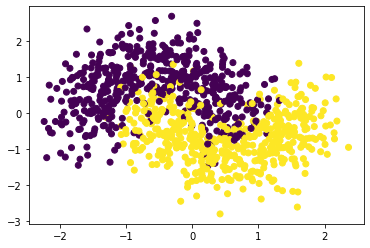

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [12]:
def train_test(clf, X_train, X_test, y_train, y_test, repeats):
    e_in=np.empty(shape=(repeats,1))
    e_out = np.empty(shape=(repeats,1))

    for i in range(0,repeats):
        clf.fit(X_train, y_train)
        e_in[i,]=clf.score(X_train, y_train)
        e_out[i,]=clf.score(X_test, y_test)

    return e_in, e_out

In [13]:
def prob_epsilons(epsilons, e_in, e_out):
    """Calculate the probability that |e_in-e_out| > epsilon for each of the provided epsilons"""
    e_diff = abs(e_in-e_out)
    prob_epsilon=[]
    for e in epsilons:
        prob_epsilon.append(len([1 for i in e_diff if i > e])/len(e_diff))
    return prob_epsilon

In [14]:
def plot_abs_eps(epsilons, prob_epsilon, N):

    plt.plot(epsilons, prob_epsilon)

    hoef = [2*math.exp(-2*N*e**2) for e in epsilons]

    print("N =",N)
    print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
    plt.plot(epsilons, hoef,'r')
    #plt.yscale('log')
    plt.show()

In [15]:
repeats = 1000
N1 = 800
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=N1)
e_in1, e_out1 = train_test(MLPClassifier(max_iter=500, solver='lbfgs', hidden_layer_sizes=(5)), X_train, X_test, y_train, y_test, repeats)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [16]:
N2 = 200
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, train_size=N2)
clf = MLPClassifier(max_iter=500, solver='lbfgs', hidden_layer_sizes=(5))
e_in2, e_out2 = train_test(clf, X_train2, X_test, y_train2, y_test, repeats)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

In

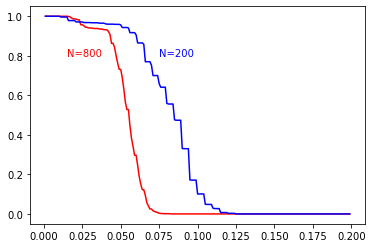

In [17]:
epsilons = np.arange(0.001,0.2,0.001)
prob_epsilon1=prob_epsilons(epsilons, e_in1, e_out1)
prob_epsilon2=prob_epsilons(epsilons, e_in2, e_out2)
plt.plot(epsilons, prob_epsilon1,'r')
plt.plot(epsilons, prob_epsilon2,'b')

plt.text(0.015,0.8,"N=800", color='r')
plt.text(0.075,0.8,"N=200", color='b')

plt.show()

N = 200
Error exceeds Hoeffding


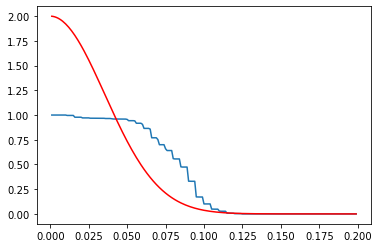

In [18]:
plot_abs_eps(epsilons, prob_epsilon2, N2)

N = 800
Error exceeds Hoeffding


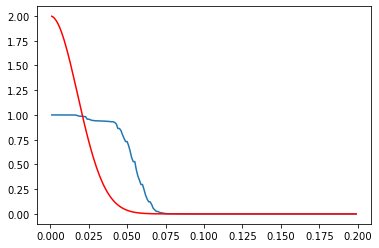

In [19]:
plot_abs_eps(epsilons, prob_epsilon1, N1)

# Reflection Task 2

### Answer:
!!!! IMPORTANT: Answer below will be based on the updated code and graph in the annoucement.

- Do these show that the Hoeffding bound is a suitable upper bound for the absolute difference between in-sample and out-of-sample error?
  - Hoeffding bound is good for a single hypothesis. However, for machine learning algorithm that runs multiple times(M is usually high), hoeffding bound no longer holds. From the graphs, we can see that the bound is broken significatly. In order to improve on this bound, VC dimension is introduced. As a simple rule of thumb, N should be close to 10 * vc dimension.
- What is the role of N, the training set size (with the test set size kept constant) in terms of the difference between Ein and Eout you should expect?
  - As N increases, we should expect the hypothesis to be more accurate in terms of reflecting true unknown target function. We can observe this from the first plot. It shows that when N is lower, the probability that Ein and Eout difference being more than epsilon is higher.
  - Ein will increase as N increases. This means that the error within training dataset increases. This is not neccessarily bad because we are reducing the generalization error.
  - Eout will decrease as N increases. This means that the error outside of the training dataset decreases.
  - Ein and Eout will converge as N increases. This means that our hypothesis gets better in approximating the unknown target function when N increases.

To show that:
- the likely difference between Ein and Eout becomes smaller as more data is used for training as predicted by the Hoeffding Bound
  - As N increases, the difference between Ein and Eout will likely to decrease. We can see this from the first plot as the probability line is generally lower for N=800 than N=200.
- the Hoeffding Bound is violated due to the learning algorithm having a preference for low Ein solutions without having the guarantee that Eout will track.
  - If Ein is low but Eout does not track(Eout is high) this will likely violate hoeffding bound.


# Task 3

Run the code (or observe the provided outputs) in the E-tivity notebook under Task 3. This code implements so-called learning curves that plot the performance of a model (both in-sample as well as out-of-sample) as this model is trained with an increasing number of data points. Observe the plots and describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between Ein and Eout and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_errors = 1- train_scores
    test_errors = 1-test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")

    
    plt.legend(loc="best")
    return plt

## Logistic regression learning curve

In [21]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

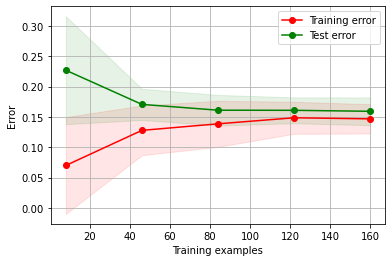

In [22]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4,train_sizes = np.linspace(0.01, .2, 5))

## Neural net learning curves

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

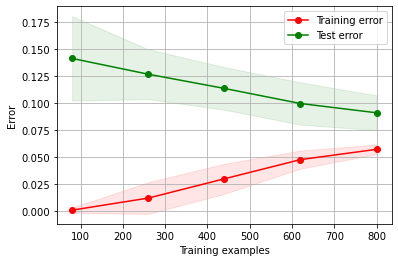

In [23]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4)

# Reflection

###  Answer

As the amount of training samples increases, we can expect the $E_{in}$ and $E_{out}$ to converge.

- Why the training error is (generally) lower than the test error
  - Training Error: Error from training data | Testing Error: Error from testing data
  - This is because the algorithm is optimized on training data, there will always be some degree of "memorization" or "over-fitting" which is likely to cause the training error to be lower than the test error. 
    - This effect will be reduced when we have more training data(N). 
    - This effect can also be reduced when we reduce the number of features used when training the model.
- Why the training error increases as the number of training samples is increased
  - Training error is the difference between the actual data point and the estimated value using the hypothesis. As N increases, it gets harder for the hypothesis to over-fit the training data. This will cause the Ein to increase. 
- Which of the two models is the more complex model
  - The neural net is a more complex model because it takes more data(N) to converge. This means that the hypothesis we arrive at is optimized for training data and not a true reflection of the unknown target function. It takes more data for the algorithm to get close to the unknown target function.
  - And the expected error for neural net is 0.075 is lower than logistic regression(0.15). This means that we can potentially achieve good result with neural net.
  - Another hint we can observe is the initial gap between Ein and Eout is larger for neural net. This means that with lower N, we over-fit our training data and it does not perform well with testing data.


# Task 4

In this last task we will explore the impact of the loss/error function on your model. Perform either Task 4a or Task 4b. Do note that the content from both tasks will be part of the online exam, so you should engage with peers who chose the other task (e.g. via the forum).

## Provided functions

Below functions implement linear regression and linear classification in a closed form (one-step solution using the pseudo-inverse).

In [24]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [25]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 4b

- ✔️ Perform a classification using the provided data in Et1_Task4b.csv.
  - ✔️ Add a function implementing the error function used in linear classification.
  - ✔️ Use the provided linear regression code to implement linear classification as described in video 3 (book Learning from Data, page 89).
  - ✔️ Plot the output of your classification as a scatter plot with the colour of the data point indicating its class membership.
  - ✔️ Plot the decision boundary in the same plot using the provided function.
  - ✔️ Quantify the error with the error function you have created.
- ✔️ In new (but similar) plots, add one data point to the dataset to illustrate how linear classification responds to outliers.
- ✔️ Add one more plot of the data with decision boundaries for both linear classification and logistic regression.

For regression the Mean Squared Error measure is a useful error measure. In this task we will explore how useful mean squared error is for classification. To this end:

- Use the provided code to classify the provided data using the linear classification algorithm
- Note that linear classification is implemented by putting a the output of a linear regression predicted value through the sign function

In [26]:
class LinearClassification:
    def fit(self, X, y):
        '''
        fit the model to provided dataset
        arguments:
            X: input space - the features that can determine the output
            y: output space - the classification of each x based on the features provided
        return: none
        '''
        self.weights = linreg_weights(X, y)

    def predict(self, X):
        '''
        predict the classificaton based on the provided features based on the weight from fit function
        arguments:
            X: features or characteristics of the data to be predicted
        return:
            y: the classification based on the features and weights
        '''
        return np.sign(linreg_predict(self.weights, X))

def plot_decison_boundary(clf, X1, X2, Y_orig, Y_hat):
    '''
        plots the boundary based on the classifier.
        this will plot the graph with a line separating two groups of data(classification)
        each area will be plotted as a meshgrid -> the colored background
        this plot overlays predicted data over original data with a smaller size to indicated if classification is correct
          e.g. as long as a dot is double colored, the prediction is wrong
        arguments:
            X1: feature 1 of all the inputs
            X2: feature 2 of all the inputs
            Y_orig: original classification of all the data
            Y_hat: predicted classification of all the data
    '''
    figure(figsize=(16, 12))
    h = 0.005
    x_min, x_max = X1.min() - 10*h, X1.max() + 10*h
    y_min, y_max = X2.min() - 10*h, X2.max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[[1] * xx.ravel(), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X1, X2, c=Y_orig, s=50, cmap='flag')
    plt.scatter(X1, X2, c=Y_hat, s=10, cmap='flag')

def get_mean_squared_error(Ys, y_hats):
    '''
        get mean square error of the prediction vs original classification
        arugments:
            Ys: original classification
            y_hats: predicted classification
        return: mean squared error
    '''
    return np.mean(np.square(Ys-y_hats))

def get_correct_score(Ys, y_hats):
    '''
        get mean square error of the prediction vs original classification
        arugments:
            Ys: original classification
            y_hats: predicted classification
        return: mean squared error
    '''
    total_count = len(Ys)
    correct_count = 0
    for index, y in enumerate(Ys):
        if y == y_hats[index]:
            correct_count = correct_count + 1
    return correct_count / total_count


In [27]:
data = np.loadtxt("Et1_Task4b.csv", delimiter=",")
X = data[:, 0:3]
y = data[:, 3]
X_outlier = np.append(X, [[1, 3, -10]], axis=0)
y_outlier = np.append(y, [-1], axis=0)


#### Linear Classification without Outlier

Mean Squared Error:  0.72
Accuracy:  0.82


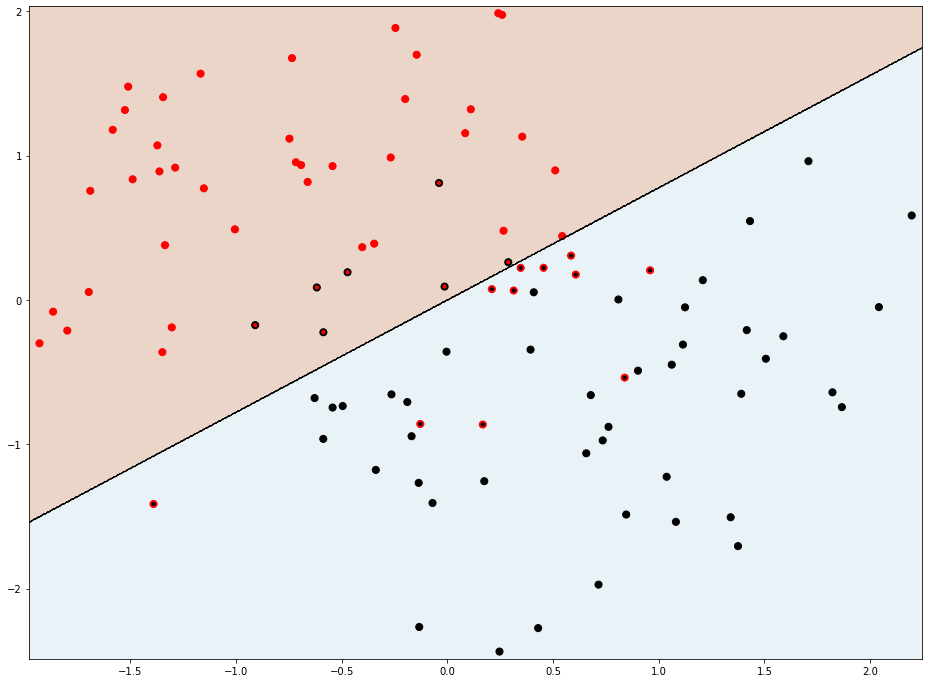

In [28]:
clf = LinearClassification()
clf.fit(X, y)
y_hat = clf.predict(X)

print("Mean Squared Error: ", get_mean_squared_error(y, y_hat))
print("Accuracy: ", get_correct_score(y, y_hat))
plot_decison_boundary(clf, X[:, 1], X[:, 2], y, y_hat)


#### Logistic Regression without Outlier

Mean Squared Error:  0.68
Accuracy:  0.83


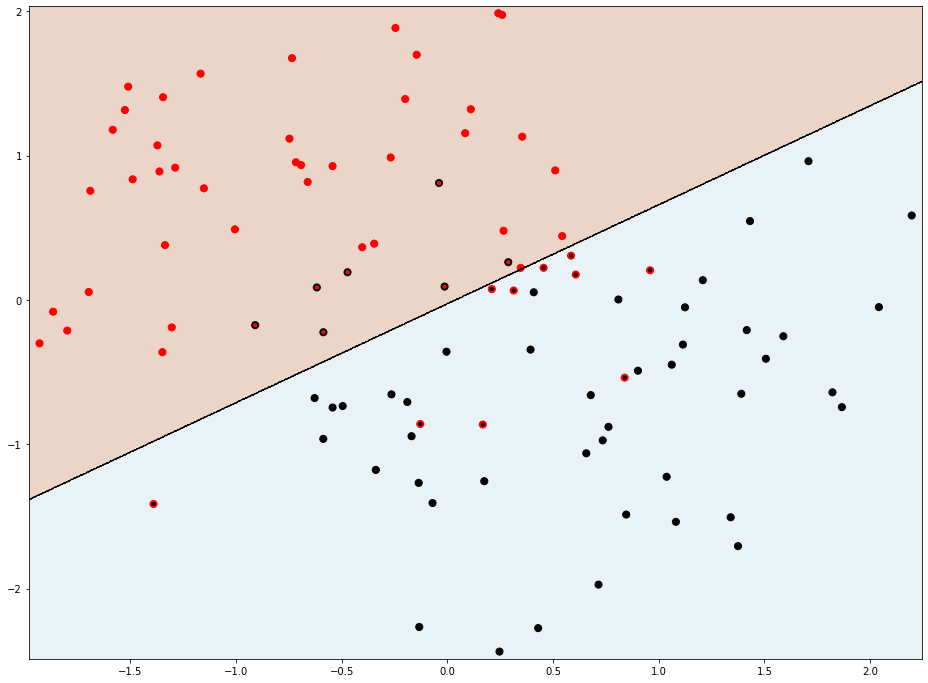

In [29]:
lrcf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lrcf.fit(X, y)
y_hat = lrcf.predict(X)

print("Mean Squared Error: ", get_mean_squared_error(y, y_hat))
print("Accuracy: ", get_correct_score(y, y_hat))
plot_decison_boundary(lrcf, X[:, 1], X[:, 2], y, y_hat)

#### Linear Classification with Outlier

Mean Squared Error:  0.9900990099009901
Accuracy:  0.7524752475247525


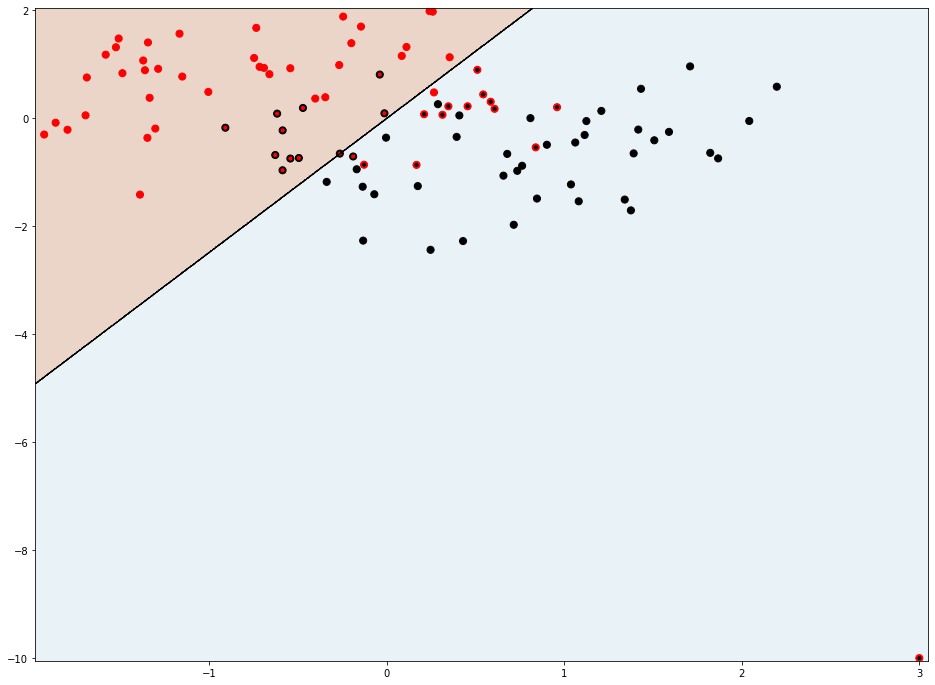

In [30]:
clf1 = LinearClassification()
clf1.fit(X_outlier, y_outlier)
y_hat_outlier = clf1.predict(X_outlier)

print("Mean Squared Error: ", get_mean_squared_error(y_outlier, y_hat_outlier))
print("Accuracy: ", get_correct_score(y_outlier, y_hat_outlier))
plot_decison_boundary(
    clf1, X_outlier[:, 1], X_outlier[:, 2], y_outlier, y_hat_outlier)


#### Logistic Regression with Outlier

Mean Squared Error:  0.7920792079207921
Accuracy:  0.801980198019802


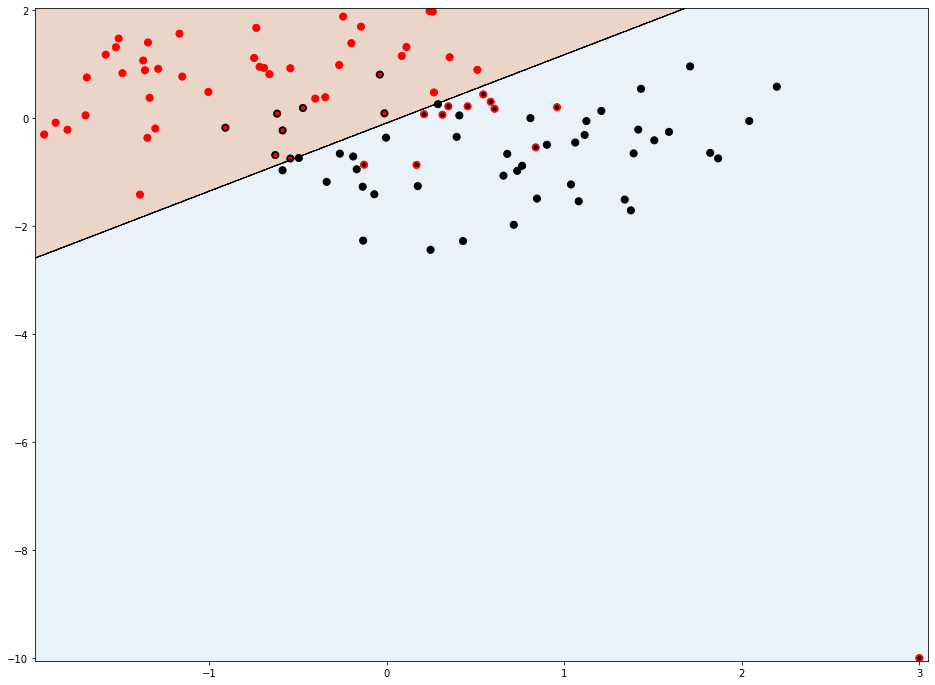

In [31]:
lrcf1 = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lrcf1.fit(X_outlier, y_outlier)
y_hat_outlier = lrcf1.predict(X_outlier)

print("Mean Squared Error: ", get_mean_squared_error(y_outlier, y_hat_outlier))
print("Accuracy: ", get_correct_score(y_outlier, y_hat_outlier))
plot_decison_boundary(lrcf1, X_outlier[:, 1], X_outlier[:, 2], y_outlier, y_hat_outlier)


### Answer
Discuss your results and answer the following:
1. Provide an indication of the contribution of the outlier to the overall MSE error.
    - With outlier introduced to our dataset, it will shift our classification results towards the outlier. Most likely, this will cause our MSE to increase.
    - MSE without outlier: 0.72
    - MSE with outlier: 0.99
2. Provide an indication of the contribution of the outlier to the error measure used by logistic regression. 
    - Similar to the above, the MSE for logistic regression increased for the dataset with outlier.
    - MSE without outlier: 0.68
    - MSE with outlier: 0.79
3. Is linear classification with mean squared error a suitable classifier? Please provide reasons.
    - In general, mean squared error is not suitable for linear classification, the reason is because we do not really care about how much the outlier deviates from the line of separation. We only care if the data points are being classified correctly. For linear classification, a ratio of correctness could be a simple yet effective measure of the classifier.

# Reflection
Describe the impact of the outlier on both models. Explain why logistic regression is less sensitive to the outlier. 